In [2]:
from xmltodict import parse
from urllib.request import urlopen
import xml.etree.ElementTree as ET

import pandas as pd
import json
import yaml

# Different Data Formats

## Comma Separated Vectors (CSV)

[Comma Separated Vector](https://en.wikipedia.org/wiki/Comma-separated_values) format is probably simplest data format out there. Here is a sample:



In [2]:
with urlopen("https://data.ibb.gov.tr/dataset/ae3b2e4b-073a-48d0-8ef3-f28f19bcb19c/resource/604776d6-e99f-469c-bf25-25ccadc5e89b/download/rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.csv") as url:
    data = pd.read_csv(url)

data.index = data['STATION_NAME']
del data['STATION_NAME']
data

,PASSAGE_COUNT,PASSENGER_COUNT,transaction_Month,transaction_Year,LINE,STATION_NUMBER,TOWN,LATITUDE,LONGITUDE
STATION_NAME,,,,,,,,,
BAGCILAR MEYDAN,453528,156555,1,2019,AKSARAY-HAVALİMANI,BGM-BGM,Bağcılar,41.034500,28.856583
BAHCELIEVLER,278544,127450,1,2019,AKSARAY-HAVALİMANI,BAH-BAH,Bahçelievler,40.995667,28.863556
BAKIRKOY,282941,136184,1,2019,AKSARAY-HAVALİMANI,BKK-BKK,Bakırköy,40.996583,28.874417
IDTM,146589,56965,1,2019,AKSARAY-HAVALİMANI,DTM-DTM,Bakırköy,40.986556,28.828417
KARTALTEPE,982793,397500,1,2019,AKSARAY-HAVALİMANI,KRP-KRP,Bayrampaşa,41.048500,28.895778
...,...,...,...,...,...,...,...,...,...
KABATAS,47856,21777,12,2020,TAKSİM-KABATAŞ FUNİKULERİ,KTS-TKS,Beyoğlu,41.034056,28.992028
TAKSIM,35136,17505,12,2020,TAKSİM-KABATAŞ FUNİKULERİ,TAK-KBT,Beyoğlu,41.036750,28.986444
Bulgurlu,146791,40586,12,2020,ÜSKÜDAR ÇEKMEKÖY METROSU,BLG-BLG,Üsküdar,41.016583,29.075444


One can see this data as a large matrix where each row and each column has a name. 

For most of our purposes, we are going to access different data formats via [pandas](https://pandas.pydata.org/) python library using their [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).  

One can access the data via these names:

In [3]:
data.loc[['KARTALTEPE','KABATAS'],['PASSENGER_COUNT', 'transaction_Month','transaction_Year']]

,PASSENGER_COUNT,transaction_Month,transaction_Year
STATION_NAME,,,
KARTALTEPE,397500,1,2019
KARTALTEPE,381739,3,2019
KARTALTEPE,24402,4,2020
KARTALTEPE,398918,6,2019
KARTALTEPE,166257,6,2020
KARTALTEPE,374119,8,2019
KARTALTEPE,233669,8,2020
KARTALTEPE,385744,9,2019
KARTALTEPE,397041,10,2019


One can access the row or columns:

In [4]:
data['STATION_NUMBER']

STATION_NAME
BAGCILAR MEYDAN    BGM-BGM
BAHCELIEVLER       BAH-BAH
BAKIRKOY           BKK-BKK
IDTM               DTM-DTM
KARTALTEPE         KRP-KRP
                    ...   
KABATAS            KTS-TKS
TAKSIM             TAK-KBT
Bulgurlu           BLG-BLG
IHLAMUR KUYU       IKI-IKI
NaN                    NaN
Name: STATION_NUMBER, Length: 5864, dtype: object

In [5]:
data.loc['İTÜ Güney',:]

,PASSAGE_COUNT,PASSENGER_COUNT,transaction_Month,transaction_Year,LINE,STATION_NUMBER,TOWN,LATITUDE,LONGITUDE
STATION_NAME,,,,,,,,,
İTÜ Güney,521906,146903,1,2020,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139
İTÜ Güney,477942,138330,2,2020,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139
İTÜ Güney,35459,10394,4,2020,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139
İTÜ Güney,501709,136985,5,2019,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139
İTÜ Güney,408114,125638,7,2019,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139
İTÜ Güney,551933,152797,10,2019,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139
İTÜ Güney,483185,136966,1,2019,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139
İTÜ Güney,430740,131479,2,2019,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139
İTÜ Güney,530192,143271,3,2019,TAKSİM-4.LEVENT,ITU-ITU,Şişli,41.108083,29.020139


Or, you may even chose more than one columns and rows:

In [6]:
data[["transaction_Year","PASSENGER_COUNT","TOWN"]]

,transaction_Year,PASSENGER_COUNT,TOWN
STATION_NAME,,,
BAGCILAR MEYDAN,2019,156555,Bağcılar
BAHCELIEVLER,2019,127450,Bahçelievler
BAKIRKOY,2019,136184,Bakırköy
IDTM,2019,56965,Bakırköy
KARTALTEPE,2019,397500,Bayrampaşa
...,...,...,...
KABATAS,2020,21777,Beyoğlu
TAKSIM,2020,17505,Beyoğlu
Bulgurlu,2020,40586,Üsküdar


You may even filter. For example, let us find the stations where monthly passenger count was larger than half a million in the year 2019.

In [7]:
data[(data["PASSENGER_COUNT"]>5e5) & (data["transaction_Year"]==2019)]

,PASSAGE_COUNT,PASSENGER_COUNT,transaction_Month,transaction_Year,LINE,STATION_NUMBER,TOWN,LATITUDE,LONGITUDE
STATION_NAME,,,,,,,,,
YENIKAPI,1613236,604662,2,2019,AKSARAY-HAVALİMANI,YNK-YNH,Fatih,41.005194,28.951722
YENIKAPI,1929941,703869,3,2019,AKSARAY-HAVALİMANI,YNK-YNH,Fatih,41.005194,28.951722
Yenikapı-2,1035429,513328,4,2019,MARMARAY,YNK-MR2,Fatih,41.005167,28.951611
Yenikapı-2,1065377,525756,7,2019,MARMARAY,YNK-MR2,Fatih,41.005167,28.951611
YENIKAPI,1838132,719132,9,2019,AKSARAY-HAVALİMANI,YNK-YNH,Fatih,41.005194,28.951722
Taksim Güney,1279598,519086,9,2019,TAKSİM-4.LEVENT,TAK-TAK,Beyoğlu,41.037139,28.985750
Taksim Güney,1366330,533692,12,2019,TAKSİM-4.LEVENT,TAK-TAK,Beyoğlu,41.037139,28.985750
YENIKAPI,1630879,685525,6,2019,AKSARAY-HAVALİMANI,YNK-YNH,Fatih,41.005194,28.951722
Yenikapı-2,1126538,555053,9,2019,MARMARAY,YNK-MR2,Fatih,41.005167,28.951611


We may even group, sum, take means etc.

<AxesSubplot:xlabel='transaction_Month'>

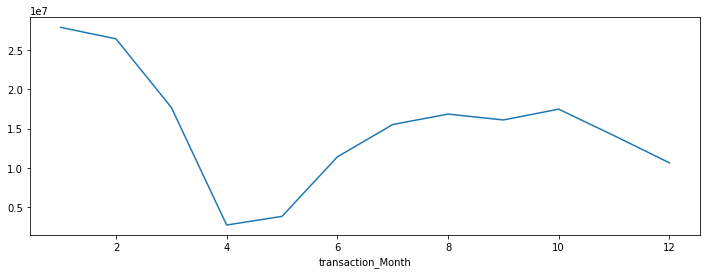

In [9]:
res = data[data['transaction_Year']==2020].groupby('transaction_Month').sum()['PASSENGER_COUNT']
res.plot(figsize=(12,4))

Microsoft excel files are also CSV files but recorded in a different format:

In [10]:
xls = pd.read_excel("./data/oecd_population_data.xls")
xls

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POP,TOT,AGRWTH,A,1951,2.971132,NaN
1,AUS,POP,TOT,AGRWTH,A,1952,2.550554,NaN
2,AUS,POP,TOT,AGRWTH,A,1953,2.070283,NaN
3,AUS,POP,TOT,AGRWTH,A,1954,1.942078,NaN
4,AUS,POP,TOT,AGRWTH,A,1955,2.372448,NaN
...,...,...,...,...,...,...,...,...
15843,EU27,POP,WOMEN,MLN_PER,A,2016,227831.860500,NaN
15844,EU27,POP,WOMEN,MLN_PER,A,2017,228089.551500,NaN
15845,EU27,POP,WOMEN,MLN_PER,A,2018,228375.375500,NaN
15846,EU27,POP,WOMEN,MLN_PER,A,2019,228744.232000,NaN


In [11]:
criteria = (xls['LOCATION']=='TUR') & (xls['SUBJECT'] == 'TOT') & (xls['MEASURE'] == 'MLN_PER')

sel = xls.loc[criteria, : ]

sel.index = sel['TIME']
del sel['TIME']
sel

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
1950,TUR,POP,TOT,MLN_PER,A,20.807000,NaN
1951,TUR,POP,TOT,MLN_PER,A,21.351000,NaN
1952,TUR,POP,TOT,MLN_PER,A,21.952000,NaN
1953,TUR,POP,TOT,MLN_PER,A,22.569000,NaN
1954,TUR,POP,TOT,MLN_PER,A,23.204000,NaN
...,...,...,...,...,...,...,...
2016,TUR,POP,TOT,MLN_PER,A,79.277971,NaN
2017,TUR,POP,TOT,MLN_PER,A,80.312708,NaN
2018,TUR,POP,TOT,MLN_PER,A,81.407211,NaN


<AxesSubplot:xlabel='TIME'>

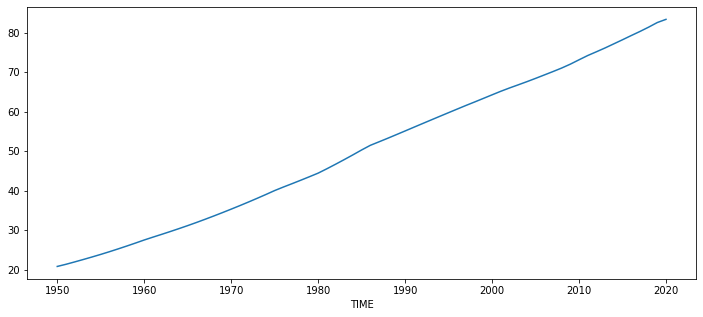

In [12]:
sel['Value'].plot(figsize=(12,5))

# Javascript Object Notation (JSON)

[JSON](https://en.wikipedia.org/wiki/JSON) data format is more verbose but is also flexible than CSV format. Here is a sample:

In [13]:
with open('./data/example.json') as file:
    raw = json.load(file)

raw

[{'firstName': 'John',
  'lastName': 'Smith',
  'isAlive': True,
  'age': 27,
  'address': {'streetAddress': '21 2nd Street',
   'city': 'New York',
   'state': 'NY',
   'postalCode': '10021-3100'},
  'phoneNumbers': [{'type': 'home', 'number': '212 555-1234'},
   {'type': 'office', 'number': '646 555-4567'}],
  'children': [],
  'spouse': None},
 {'firstName': 'Jane',
  'lastName': 'Doe',
  'isAlive': True,
  'age': 29,
  'address': {'streetAddress': '431 Main Street',
   'city': 'San Fransisco',
   'state': 'CA',
   'postalCode': '50421'},
  'phoneNumbers': [{'type': 'home', 'number': '561 555-1234'},
   {'type': 'office', 'number': '555 555-4567'}],
  'children': [],
  'spouse': None}]

In [14]:
raw[0]['address']['city']

'New York'

One thing you should notice is that we can import a JSON file directly as a python dictionary, or as an array of python dictionaries. The other thing you should notice is that python dictionaries, or array of dictionaries, are much more general since they allow any *hashable* python data structure to be a key. 

In [15]:
xs = {(0,1): "a", -1: {0,1,2}, "b": [0,1,2], True: False}
xs

{(0, 1): 'a', -1: {0, 1, 2}, 'b': [0, 1, 2], True: False}

However, a JSON file when parsed can only have strings as keys:

In [16]:
with open("./data/example2.json") as file:
    tmp = json.load(file)
    
tmp

{'(0,1)': 'a', '-1': '{0,1,2}', 'b': [0, 1, 2], 'True': 'False'}

In [17]:
with open('./data/example.json') as file:
    df = pd.read_json(file)
    
df

,firstName,lastName,isAlive,age,address,phoneNumbers,children,spouse
0,John,Smith,True,27,"{'streetAddress': '21 2nd Street', 'city': 'Ne...","[{'type': 'home', 'number': '212 555-1234'}, {...",[],NaN
1,Jane,Doe,True,29,"{'streetAddress': '431 Main Street', 'city': '...","[{'type': 'home', 'number': '561 555-1234'}, {...",[],NaN


JSON data format is recursive. This means every named place could be another data that has the structure of a dictionary, or an array of dictionaries:

In [18]:
[ [y['number'] for y in x['phoneNumbers']] for x in raw ]

[['212 555-1234', '646 555-4567'], ['561 555-1234', '555 555-4567']]

In [19]:
raw[0]['phoneNumbers']

[{'type': 'home', 'number': '212 555-1234'},
 {'type': 'office', 'number': '646 555-4567'}]

In [20]:
raw[1]['address']

{'streetAddress': '431 Main Street',
 'city': 'San Fransisco',
 'state': 'CA',
 'postalCode': '50421'}

But most of the time, a JSON file is just another CSV file written in this format:

In [23]:
with open('./data/iris.csv') as file:
    txt = file.read()
    
txt

'"sepal.length","sepal.width","petal.length","petal.width","variety"\n5.1,3.5,1.4,.2,"Setosa"\n4.9,3,1.4,.2,"Setosa"\n4.7,3.2,1.3,.2,"Setosa"\n4.6,3.1,1.5,.2,"Setosa"\n5,3.6,1.4,.2,"Setosa"\n5.4,3.9,1.7,.4,"Setosa"\n4.6,3.4,1.4,.3,"Setosa"\n5,3.4,1.5,.2,"Setosa"\n4.4,2.9,1.4,.2,"Setosa"\n4.9,3.1,1.5,.1,"Setosa"\n5.4,3.7,1.5,.2,"Setosa"\n4.8,3.4,1.6,.2,"Setosa"\n4.8,3,1.4,.1,"Setosa"\n4.3,3,1.1,.1,"Setosa"\n5.8,4,1.2,.2,"Setosa"\n5.7,4.4,1.5,.4,"Setosa"\n5.4,3.9,1.3,.4,"Setosa"\n5.1,3.5,1.4,.3,"Setosa"\n5.7,3.8,1.7,.3,"Setosa"\n5.1,3.8,1.5,.3,"Setosa"\n5.4,3.4,1.7,.2,"Setosa"\n5.1,3.7,1.5,.4,"Setosa"\n4.6,3.6,1,.2,"Setosa"\n5.1,3.3,1.7,.5,"Setosa"\n4.8,3.4,1.9,.2,"Setosa"\n5,3,1.6,.2,"Setosa"\n5,3.4,1.6,.4,"Setosa"\n5.2,3.5,1.5,.2,"Setosa"\n5.2,3.4,1.4,.2,"Setosa"\n4.7,3.2,1.6,.2,"Setosa"\n4.8,3.1,1.6,.2,"Setosa"\n5.4,3.4,1.5,.4,"Setosa"\n5.2,4.1,1.5,.1,"Setosa"\n5.5,4.2,1.4,.2,"Setosa"\n4.9,3.1,1.5,.2,"Setosa"\n5,3.2,1.2,.2,"Setosa"\n5.5,3.5,1.3,.2,"Setosa"\n4.9,3.6,1.4,.1,"Setosa"\n4.

In [24]:
with open('./data/iris.json') as file:
    js = json.load(file)
    
js

[{'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '5.1',
  'sepal.width': '3.5',
  'variety': 'Setosa'},
 {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '4.9',
  'sepal.width': '3',
  'variety': 'Setosa'},
 {'petal.length': '1.3',
  'petal.width': '.2',
  'sepal.length': '4.7',
  'sepal.width': '3.2',
  'variety': 'Setosa'},
 {'petal.length': '1.5',
  'petal.width': '.2',
  'sepal.length': '4.6',
  'sepal.width': '3.1',
  'variety': 'Setosa'},
 {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '5',
  'sepal.width': '3.6',
  'variety': 'Setosa'},
 {'petal.length': '1.7',
  'petal.width': '.4',
  'sepal.length': '5.4',
  'sepal.width': '3.9',
  'variety': 'Setosa'},
 {'petal.length': '1.4',
  'petal.width': '.3',
  'sepal.length': '4.6',
  'sepal.width': '3.4',
  'variety': 'Setosa'},
 {'petal.length': '1.5',
  'petal.width': '.2',
  'sepal.length': '5',
  'sepal.width': '3.4',
  'variety': 'Setosa'},
 {'petal.length': '1.4',
  'petal.widt

You may even convert formats:

In [25]:
df = pd.DataFrame(js)
df

,petal.length,petal.width,sepal.length,sepal.width,variety
0,1.4,.2,5.1,3.5,Setosa
1,1.4,.2,4.9,3,Setosa
2,1.3,.2,4.7,3.2,Setosa
3,1.5,.2,4.6,3.1,Setosa
4,1.4,.2,5,3.6,Setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3,Virginica
146,5,1.9,6.3,2.5,Virginica
147,5.2,2,6.5,3,Virginica
148,5.4,2.3,6.2,3.4,Virginica


In [26]:
json.loads(df.transpose().to_json())

{'0': {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '5.1',
  'sepal.width': '3.5',
  'variety': 'Setosa'},
 '1': {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '4.9',
  'sepal.width': '3',
  'variety': 'Setosa'},
 '2': {'petal.length': '1.3',
  'petal.width': '.2',
  'sepal.length': '4.7',
  'sepal.width': '3.2',
  'variety': 'Setosa'},
 '3': {'petal.length': '1.5',
  'petal.width': '.2',
  'sepal.length': '4.6',
  'sepal.width': '3.1',
  'variety': 'Setosa'},
 '4': {'petal.length': '1.4',
  'petal.width': '.2',
  'sepal.length': '5',
  'sepal.width': '3.6',
  'variety': 'Setosa'},
 '5': {'petal.length': '1.7',
  'petal.width': '.4',
  'sepal.length': '5.4',
  'sepal.width': '3.9',
  'variety': 'Setosa'},
 '6': {'petal.length': '1.4',
  'petal.width': '.3',
  'sepal.length': '4.6',
  'sepal.width': '3.4',
  'variety': 'Setosa'},
 '7': {'petal.length': '1.5',
  'petal.width': '.2',
  'sepal.length': '5',
  'sepal.width': '3.4',
  'variety': 'Setosa'}

# Yet Another Markup Language (YAML)

[Yet Another Markup Language](https://en.wikipedia.org/wiki/YAML) is a very versatile data format used in variety of applications. It is not as widely used as JSON or XML. Here is a sample:

In [27]:
with open('./data/example3.yml') as file:
    yml = file.read()
    
print(yml)

---
receipts:
  - receipt:     Oz-Ware Purchase Invoice
    date:        2012-08-06
    customer:
        first_name:   Dorothy
        family_name:  Gale

    items:
      - part_no:   A4786
        descrip:   Water Bucket (Filled)
        price:     1.47
        quantity:  4

      - part_no:   E1628
        descrip:   High Heeled "Ruby" Slippers
        size:      8
        price:     133.7
        quantity:  1

    bill-to:  &id001
        street: |
            123 Tornado Alley
            Suite 16
        city:   East Centerville
        state:  KS

    ship-to:  *id001

    specialDelivery:  >
      Follow the Yellow Brick
      Road to the Emerald City.
      Pay no attention to the
      man behind the curtain.
  - receipt:    Oz-Ware Purchase Invoice
    date:       2020-02-29
    customer:
        first_name:   Man
        family_name:  Tin

    items:
      - part_no:  C9090
        descrip:  Heart
        price:    2.0
        quantity: 1

    bill-to: *id001
    specialDe

In [28]:
with open('./data/example3.yml') as file:
    yml = yaml.safe_load(file)
    
yml

{'receipts': [{'receipt': 'Oz-Ware Purchase Invoice',
   'date': datetime.date(2012, 8, 6),
   'customer': {'first_name': 'Dorothy', 'family_name': 'Gale'},
   'items': [{'part_no': 'A4786',
     'descrip': 'Water Bucket (Filled)',
     'price': 1.47,
     'quantity': 4},
    {'part_no': 'E1628',
     'descrip': 'High Heeled "Ruby" Slippers',
     'size': 8,
     'price': 133.7,
     'quantity': 1}],
   'bill-to': {'street': '123 Tornado Alley\nSuite 16\n',
    'city': 'East Centerville',
    'state': 'KS'},
   'ship-to': {'street': '123 Tornado Alley\nSuite 16\n',
    'city': 'East Centerville',
    'state': 'KS'},
   'specialDelivery': 'Follow the Yellow Brick Road to the Emerald City. Pay no attention to the man behind the curtain.\n'},
  {'receipt': 'Oz-Ware Purchase Invoice',
   'date': datetime.date(2020, 2, 29),
   'customer': {'first_name': 'Man', 'family_name': 'Tin'},
   'items': [{'part_no': 'C9090',
     'descrip': 'Heart',
     'price': 2.0,
     'quantity': 1}],
   'bill-

In [29]:
yml['receipts'][0]['customer']['first_name']

'Dorothy'

# Extensible Markup Language


[XML](https://en.wikipedia.org/wiki/XML) is a complicated data and markup language. It basically assume the structure of the data/document is a tree.

![XML](images/Example-of-XML-document-and-XML-tree-representation.png)

[Source](https://www.researchgate.net/figure/Example-of-XML-document-and-XML-tree-representation_fig1_315998361)

Here is a hand-encoded dictionary version of the XML data you see in the picture:

In [40]:
xmlString = """
<library>
    <book>
       <year>1990</year>
       <title>XML Labeling</title>
       <publisher>Smart Publ.</publisher>
    </book>
    <magazine>
       <issue>1</issue>
       <title>Technology</title>
       <publisher>Ideal Publ.</publisher>
    </magazine>
</library>
"""

xml = ET.fromstring(xmlString)
xml

<Element 'library' at 0x7f2c33e67f60>

In [31]:
{'library': 
  {'book': {'year': 1990, 'title': 'XML Labeling', 'publisher': 'Smart Publ.'},
   'magazine' : {'issue': 1, 'title': 'Tecnology', 'publisher': 'Ideal Publ'}}
}

{'library': {'book': {'year': 1990,
   'title': 'XML Labeling',
   'publisher': 'Smart Publ.'},
  'magazine': {'issue': 1, 'title': 'Tecnology', 'publisher': 'Ideal Publ'}}}

There are many variations of XML. Most famous and widely used variation of XML is [Hypertext Markup Language (HTML)](https://en.wikipedia.org/wiki/HTML). XML requires its own lecture (which I am not going to do!). The safest method to deal with XML via python is to convert it into a dictionary (or a hash-map) via [xmltodict](https://github.com/martinblech/xmltodict) library.

Here is an example:

In [30]:
with urlopen("https://stats.oecd.org/restsdmx/sdmx.ashx/GetData/WEALTH/AUS+AUT+BEL+CAN+CHL+DNK+EST+FIN+FRA+DEU+GRC+HUN+IRL+ITA+JPN+KOR+LVA+LTU+LUX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+GBR+USA/all?startTime=2010&endTime=2022") as url:
    raw = parse(url,encoding='utf-8')
    
raw

OrderedDict([('message:MessageGroup',
              OrderedDict([('@xmlns',
                            'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/generic'),
                           ('@xmlns:common',
                            'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/common'),
                           ('@xsi:schemaLocation',
                            'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/generic http://www.sdmx.org/docs/2_0/SDMXGenericData.xsd http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message http://www.sdmx.org/docs/2_0/SDMXMessage.xsd'),
                           ('@xmlns:xsi',
                            'http://www.w3.org/2001/XMLSchema-instance'),
                           ('@xmlns:message',
                            'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message'),
                           ('Header',
                            OrderedDict([('@xmlns',
                                          'http://www.SDMX.org/re

In [32]:
data = raw['message:MessageGroup']['DataSet']['Series']

In [33]:
[x['Obs'] for x in data]

[[OrderedDict([('Time', '2012'),
               ('ObsValue', OrderedDict([('@value', '139870')]))]),
  OrderedDict([('Time', '2014'),
               ('ObsValue', OrderedDict([('@value', '164058')]))]),
  OrderedDict([('Time', '2018'),
               ('ObsValue', OrderedDict([('@value', '216351')]))])],
 [OrderedDict([('Time', '2012'),
               ('ObsValue', OrderedDict([('@value', '130092')]))]),
  OrderedDict([('Time', '2014'),
               ('ObsValue', OrderedDict([('@value', '144916')]))]),
  OrderedDict([('Time', '2018'),
               ('ObsValue', OrderedDict([('@value', '184209')]))])],
 [OrderedDict([('Time', '2012'),
               ('ObsValue', OrderedDict([('@value', '595820')]))]),
  OrderedDict([('Time', '2014'),
               ('ObsValue', OrderedDict([('@value', '649993')]))]),
  OrderedDict([('Time', '2018'),
               ('ObsValue', OrderedDict([('@value', '811432')]))])],
 [OrderedDict([('Time', '2012'),
               ('ObsValue', OrderedDict([('@value', '23

In [34]:
data[0].keys()

odict_keys(['SeriesKey', 'Attributes', 'Obs'])

In [4]:
with urlopen("https://stats.oecd.org/restsdmx/sdmx.ashx/GetData/WEALTH/AUS+AUT+BEL+CAN+CHL+DNK+EST+FIN+FRA+DEU+GRC+HUN+IRL+ITA+JPN+KOR+LVA+LTU+LUX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+GBR+USA/all?startTime=2010&endTime=2022") as url:
    raw = ET.parse(url)
    
raw

In [67]:
raw.getroot().keys()

['{http://www.w3.org/2001/XMLSchema-instance}schemaLocation']

In [45]:
[x.tag for x in r]

['{http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message}Header',
 '{http://www.SDMX.org/resources/SDMXML/schemas/v2_0/generic}DataSet']

In [59]:
aa = xml.iter()

In [61]:
list(aa)

[<Element 'library' at 0x7f2c33e67f60>,
 <Element 'book' at 0x7f2c33e665c0>,
 <Element 'year' at 0x7f2c33e66e30>,
 <Element 'title' at 0x7f2c33e66b60>,
 <Element 'publisher' at 0x7f2c33e651c0>,
 <Element 'magazine' at 0x7f2c33e66250>,
 <Element 'issue' at 0x7f2c33e66b10>,
 <Element 'title' at 0x7f2c33e649f0>,
 <Element 'publisher' at 0x7f2c33e66160>]